## **Drift‐Independent Volatility Estimation Based on High, Low, Open, and Close Prices**

Link to the paper: https://www.jstor.org/stable/10.1086/209650

**Abstract**: The paper presents a novel volatility estimator derived from multiple periods of high, low, open, and close prices within a historical time series. This new estimator boasts several advantageous properties: it is (a) unbiased in the continuous limit, (b) unaffected by drift, (c) consistent in managing opening price jumps. Moreover, it exhibits the lowest variance among all estimators possessing similar characteristics. The enhancement in accuracy compared to the conventional close-to-close estimator is notably significant when applied to real-life time series data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from google.colab import drive
df = pd.read_csv('/content/NIFTY 50_Historical_PR_01011994to31122023.csv')

In [ ]:
df

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,29-Dec-23,21737.65,21770.3,21676.9,21731.40
1,NIFTY 50,28-Dec-23,21715,21801.45,21678,21778.70
2,NIFTY 50,27-Dec-23,21497.65,21675.75,21495.8,21654.75
3,NIFTY 50,26-Dec-23,21365.2,21477.15,21329.45,21441.35
4,NIFTY 50,22-Dec-23,21295.85,21390.5,21232.45,21349.40
...,...,...,...,...,...,...
7428,NaN,NaN,NaN,NaN,NaN,NaN
7429,NaN,NaN,NaN,NaN,NaN,NaN
7430,NaN,NaN,NaN,NaN,NaN,NaN
7431,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# T = 1
# f = 0.5
# v = 1.1  #v = volatility
# d = 0.9  #d = drift
# Closed_period_length = f*T
# Open_period_length = (1-f)*T

We will assume that price movements are modeled as a geometric Brownian motion, which means that the logarithm of the security price is a Brownian motion with two parameters, volatility s and drift m.

f = 0 means that there is no opening jump, and the case f = 1 implies that price movement in the period is dominated by the opening jump.

Also f depends on T, f(daily)>f(weekly)

In [ ]:
# drift_continuous =  d*T*(1 - f)
# variance_continuous = v*v*T*(1 - f)
# frequency_jumping = 1
# #Frequency_jumping is the the frequency parameter of the Poisson-driven jumping process
# #The jump made is assumed to be a gaussian random variable with
# Mean = d*T*f
# Variance = v*v*T*f

The notation adopted in the current article is similar to that used by Garman and Klass (1980):

*   T = time interval of each period, which is set to one without the
 loss of generality;
*   f = fraction of the period (between [0, 1]) that trading is
 closed;
*   v = unknown variance, which is the unknown volatility squared;
*   C0 = closing price of the previous period (at time 0);
*   O1 = opening price of the current period (at time f);
*   H1 =the current period's high during the trading interval (between [ f, 1]);
*   L1 = the current period's low during the trading interval(between [ f, 1]);
*   C1 = closing price of the current period (at time 1);
*   o = lnO1 - lnC0, the normalized open;
*    u = lnH1 - lnO1, the normalized high;
*   d = lnL1 - lnO1, the normalized low;
*   c = lnC1 - ln O1, the normalized close.

Using the aforementioned notation, the classical variance estimator based on the close-to-close prices of an n-period historical data set can be written as

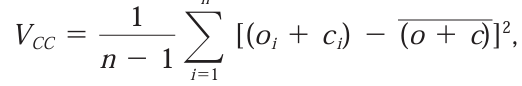

This estimator is independent of the drift m and the opening jump f and is unbiased, which means E[Vcc] = v*v, where E[ ]denotes taking the expectation. The classical variance estimator Vcc serves as a benchmark for all other variance estimators.

In [ ]:
# Replace invalid values ('-') with NaN
df.replace('-', np.nan, inplace=True)
df.dropna(subset=['Open', 'High', 'Low'], inplace=True)
df

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,29-Dec-23,21737.65,21770.3,21676.9,21731.40
1,NIFTY 50,28-Dec-23,21715,21801.45,21678,21778.70
2,NIFTY 50,27-Dec-23,21497.65,21675.75,21495.8,21654.75
3,NIFTY 50,26-Dec-23,21365.2,21477.15,21329.45,21441.35
4,NIFTY 50,22-Dec-23,21295.85,21390.5,21232.45,21349.40
...,...,...,...,...,...,...
7001,NIFTY 50,09-Nov-95,960.32,960.32,952.13,953.07
7002,NIFTY 50,08-Nov-95,976.28,976.28,962.98,964.01
7003,NIFTY 50,07-Nov-95,987.17,987.17,977.05,978.22
7004,NIFTY 50,06-Nov-95,1001.53,1001.53,988.92,988.92


In [ ]:
#to ensure that data is in the floating-point format, allowing for decimal and fractional values
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)

In [ ]:
df['u'] = np.log(df['High']) - np.log(df['Open'])
df['d'] = np.log(df['Low']) - np.log(df['Open'])
df['c'] = np.log(df['Close']) - np.log(df['Open'])
df['o'] = np.log(df['Open']) - np.log(df['Close']).shift(1)
df.head()

,Index Name,Date,Open,High,Low,Close,u,d,c,o
0,NIFTY 50,29-Dec-23,21737.65,21770.30,21676.90,21731.40,0.001501,-0.002799,-0.000288,NaN
1,NIFTY 50,28-Dec-23,21715.00,21801.45,21678.00,21778.70,0.003973,-0.001705,0.002929,-0.000755
2,NIFTY 50,27-Dec-23,21497.65,21675.75,21495.80,21654.75,0.008250,-0.000086,0.007281,-0.012989
3,NIFTY 50,26-Dec-23,21365.20,21477.15,21329.45,21441.35,0.005226,-0.001675,0.003558,-0.013461
4,NIFTY 50,22-Dec-23,21295.85,21390.50,21232.45,21349.40,0.004435,-0.002982,0.002511,-0.006809


In [ ]:
n = len(df)
normalised_value = 1/n *np.nansum(df['o'] + df['c'])
Vcc = 1/(n -1) * np.nansum((df['o'] + df['c'] - normalised_value) * (df['o'] + df['c'] - normalised_value))
Vcc

0.00021224963428618338

## **Parkinson (1980) found a variance estimator using the high and low prices only**

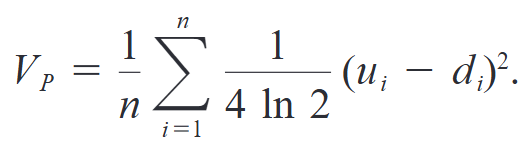


In [ ]:
Vp = 1/n * 1/4* 1/np.log(2)*sum((df['u'] - df['d']) *(df['u'] - df['d']))
Vp

0.00016558211467839433

## **A better variance estimator using the high, low, and close prices was found by Rogers and Satchell (1991) and Rogers, Satchell, and Yoon (1994)**

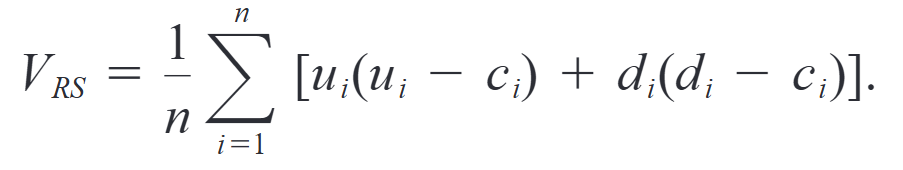

In [ ]:
Vrs = 1/n *sum(df['u']*(df['u'] - df['c'])+ df['d']*(df['d'] - df['c']))
Vrs

0.00015946908536558876

It is better than Vp because

1.   Var(Vrs) < Var(Vp)
2.   unlike
Vp , Vrs is independent of the drift



Another important feature of Vrs is
that Vrs equals zero when the security price makes a one-direction
move, either u = c and d = 0 for a straight-up move or d = c and u
= 0 for a straight-down move. This is because the price movements in
such situations can be explained by the drift term alone (zero variance).
However, Vrs still assumes no opening jumps ( f = 0).

## **Under the assumption of no drift, Garman and Klass (1980) derived analytically that the minimum-variance unbiased variance estimator is of the following combination**

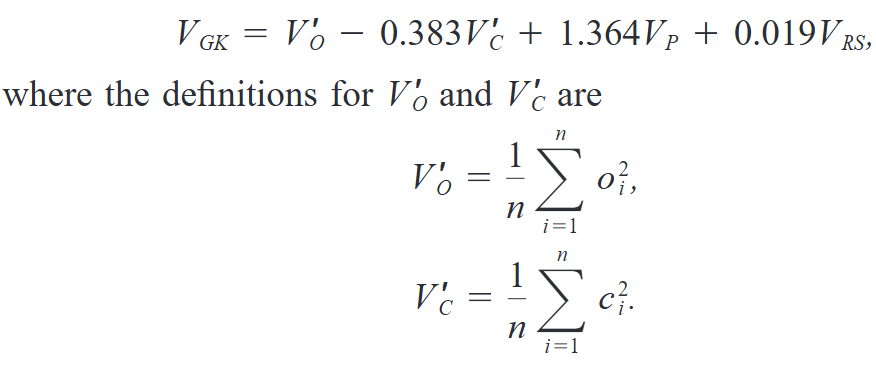

In [ ]:
Vo_ = 1/n * (df['o'] * df['o']).sum(skipna=True)
Vc_ = 1/n * (df['c'] * df['c']).sum(skipna=True)

In [ ]:
Vgk =  Vo_ - 0.383*Vc_ + 1.364*Vp + 0.019*Vrs
Vgk

0.0005780614746770721

#**A Minimum-Variance Unbiased Variance Estimator Based on Multiple-Period Data**

The minimum-variance unbiased variance estimator that is independent of the drift m and the opening jump f must have the following form:
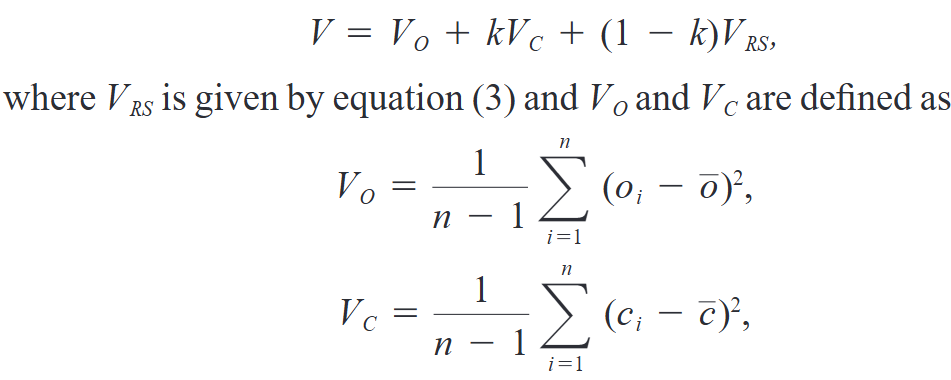

In [ ]:
o_ = 1/(n) * (df['o']).sum(skipna=True)
c_ = 1/(n) * (df['c']).sum(skipna=True)
print(o_,c_)

-0.0001278540085121417 -0.0003116957102850221


In [ ]:
Vo = 1/(n -1) * ((df['o']- o_)*(df['o']- o_) ).sum(skipna=True)
Vc = 1/(n -1) * ((df['c']- c_)*(df['c']- c_) ).sum(skipna=True)
print(Vo,Vc)

0.00042110555899635844 0.00018761692762478765


In [ ]:
f = 0.25 #fraction of time market is closed, the unobservable time interval fraction in which opening jump and drift occurs
alpha = 1.34 #the expectation of square of u(u-c) + d(d-c)

In [ ]:
k = (alpha -1)/(alpha + ((n +1)/(n -1)))
k

0.14528141655115867

In [ ]:
V = Vo + k*Vc +(1 - k)*Vrs
V

0.0005846640027582222

In [ ]:
eff = 1/(f*f + (1-f)*(1-f)*k)
eff

6.933812751826902

In [ ]:
f_critical = k/(k + 1)
f_critical

0.12685215568122254

In [ ]:
eff_critical = 1 + 1/k
eff_critical

7.883192797393086

# **Variance estimator insensitive to step size h (1/n)**
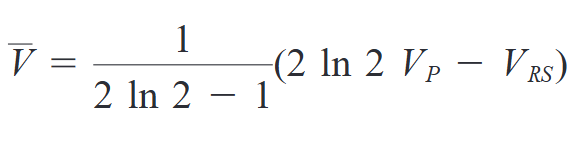

In [ ]:
Vh = 1/(2*np.log(2)-1)*(2*np.log(2)*Vp - Vrs)
Vh

0.00018140691029561108

Valid only when drift = 0 because it has Vp in it which has a zero drift assumption

# **Minimum-variance estimator under the restrictions of zero drift and finite step-size insensitivity**

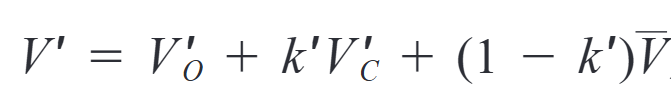

In [ ]:
Vo_ = 1/n * (df['o'] * df['o']).sum(skipna=True)
Vc_ = 1/n * (df['c'] * df['c']).sum(skipna=True)
k_ = 2.6

In [ ]:
V_ = Vo_ + k_*Vc_ + (1-k_)*Vh
V_

0.0006187977127452679

In [ ]:
print(n)

7005


In [ ]:
VarV_ = 2/n*((f*f) + 0.41*(1-f)*(1-f))
VarV_

8.369022127052105e-05